In [3]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Use the data to compare each pollutant by deaths per 100,000:

pollutants_vs_deaths = "Rhiannyn_Resources/final_merged_world_data.csv"

pollutants_vs_deaths_df = pd.read_csv(pollutants_vs_deaths)



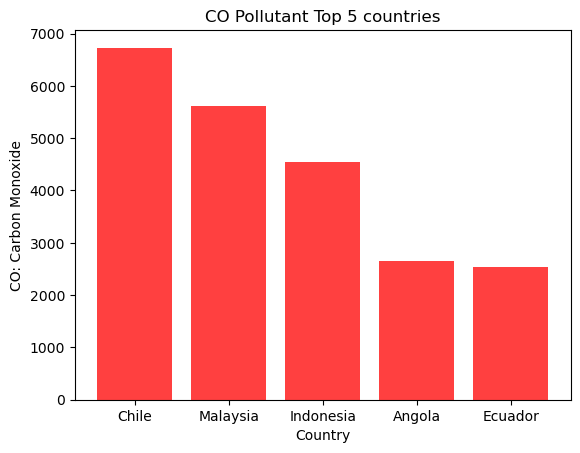

In [9]:
#Display top 5 polluted countries by CO 
Country = pollutants_vs_deaths_df["Country"]
pollutants_vs_deaths_df.sort_values("CO",ascending = False, inplace = True)
OutlierData = pollutants_vs_deaths_df[:5]

OLCo2_Emissions = OutlierData["CO"]
OLCNames = OutlierData["Country"]

plt.title("CO Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("CO: Carbon Monoxide")

plt.bar(OLCNames, OLCo2_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("Rhiannyn_Output/C0bycountry.png")
plt.show()

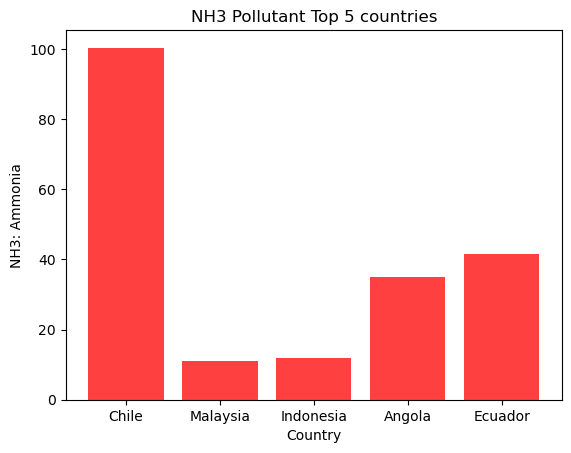

In [11]:
#Display top 5 polluted countries by NH3
Country = pollutants_vs_deaths_df["Country"]
pollutants_vs_deaths_df.sort_values("NH3",ascending = False, inplace = True)
OutlierData2 = pollutants_vs_deaths_df[:5]

OLNH3_Emissions = OutlierData["NH3"]
OLCNames = OutlierData["Country"]

plt.title("NH3 Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("NH3: Ammonia")

plt.bar(OLCNames, OLNH3_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("../NH3bycountry.png")
plt.show()


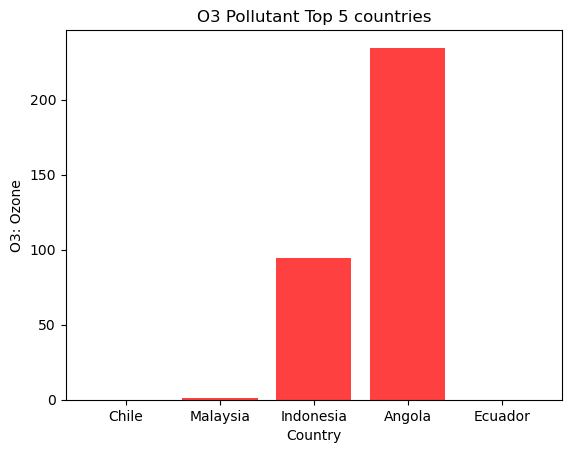

In [15]:
Country = pollutants_vs_deaths_df["Country"]
pollutants_vs_deaths_df.sort_values("O3",ascending = False, inplace = True)
OutlierData2 = pollutants_vs_deaths_df[:5]

OLNH3_Emissions = OutlierData["O3"]
OLCNames = OutlierData["Country"]

plt.title("O3 Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("O3: Ozone")

plt.bar(OLCNames, OLNH3_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("../O3bycountry.png")
plt.show()



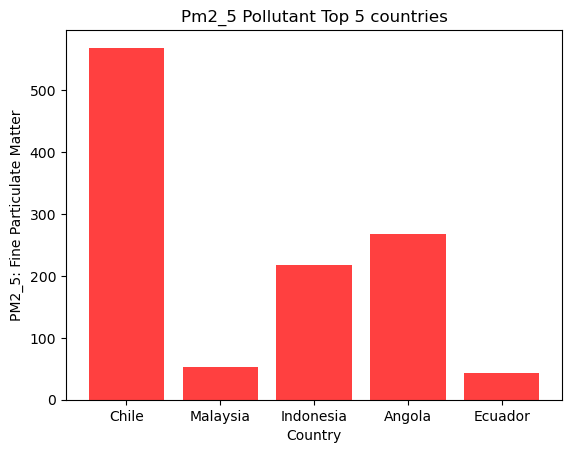

 Fine particulate matter is defined as particles that are 2.5 microns or less in diameter (PM2.5). Therefore, PM2.5 comprises a portion of PM10.


In [14]:
Country = pollutants_vs_deaths_df["Country"]
pollutants_vs_deaths_df.sort_values("PM2_5",ascending = False, inplace = True)
OutlierData2 = pollutants_vs_deaths_df[:5]

OLNH3_Emissions = OutlierData["PM2_5"]
OLCNames = OutlierData["Country"]

plt.title("Pm2_5 Pollutant Top 5 countries")
plt.xlabel("Country")
plt.ylabel("PM2_5: Fine Particulate Matter")

plt.bar(OLCNames, OLNH3_Emissions, facecolor="red", alpha=0.75, align="center")
plt.savefig("../O3bycountry.png")
plt.show()
print(f" Fine particulate matter is defined as particles that are 2.5 microns or less in diameter (PM2.5). Therefore, PM2.5 comprises a portion of PM10.")

In [61]:
# Conduct the one-way ANOVA on 1-5 AQUI by deaths, check for statistical significance:
f_oneway(pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==1]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==2]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==3]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==4]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==5]["Air pollution(deaths per 100,000)"])




F_onewayResult(statistic=4.051439039143258, pvalue=0.0037095465999225216)

In [62]:
# conduct ANOVA on 2-5 AQI, since group 1 seems to be a class unto its own:

f_oneway(pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==2]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==3]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==4]["Air pollution(deaths per 100,000)"],\
        pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==5]["Air pollution(deaths per 100,000)"])

F_onewayResult(statistic=1.7969779223841555, pvalue=0.1528466981388688)

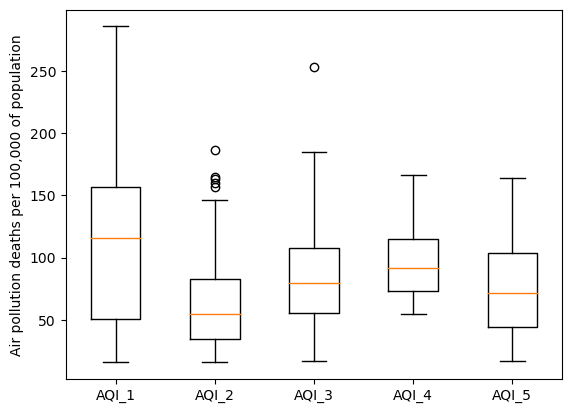

In [20]:
#plot the air quality index groups against air pollution deaths per 100000 of population
my_dict = {'AQI_1': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==1]["Air pollution(deaths per 100,000)"],\
           'AQI_2': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==2]["Air pollution(deaths per 100,000)"],\
           'AQI_3': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==3]["Air pollution(deaths per 100,000)"],\
           'AQI_4': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==4]["Air pollution(deaths per 100,000)"],\
           'AQI_5': pollutants_vs_deaths_df.loc[pollutants_vs_deaths_df["AQI"]==5]["Air pollution(deaths per 100,000)"]}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.ylabel("Air pollution deaths per 100,000 of population")
plt.savefig("../API_Deaths_Box.png")